<a href="https://colab.research.google.com/github/tady0725/boston_predict/blob/master/boston_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install pandas 

In [38]:
from sklearn import datasets # 引入sklearn裏頭的資料集
import pandas as pd # 引入Pandas

 # 將數據以改成DataFrame的方式呈現

from sklearn.datasets import load_boston # 取得波士頓房價的數據
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [39]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [40]:
# 資料轉換成pd.DataFrame
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

'''
data： 每個房子的資訊
target： 每個房子的價格
feature_names： 每個房子的特徵
DESCR： 這個資料集的描述

'''

'\ndata： 每個房子的資訊\ntarget： 每個房子的價格\nfeature_names： 每個房子的特徵\nDESCR： 這個資料集的描述\n\n'

In [41]:
boston['MEDV'] = boston_dataset.target

In [42]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [44]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


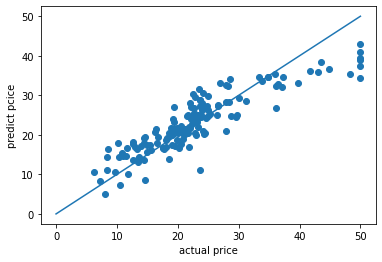

In [45]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot

x = boston_dataset.data # 13個特徵的數據
y = boston_dataset.target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lm = LinearRegression()
lm.fit(x_train, y_train) # 將資料拿去訓練

y_predict = lm.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [46]:
print(len(x_train))
print(len(x_test))
print(len(y_train))

354
152
354


In [49]:
lm.score(x_train, y_train)

0.7103879080674731

In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
print(rmse)

4.453237437198153


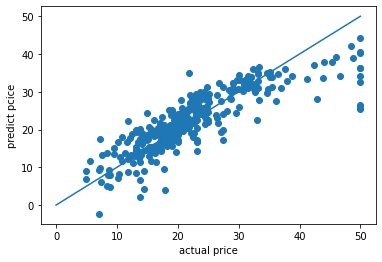

In [55]:
x_predict = lm.predict(x_train) # 北test的資料用訓練出來的模型去預測
plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_train, x_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [56]:
rmse = (np.sqrt(mean_squared_error(y_train, x_predict)))
print(rmse)

4.849055005805464


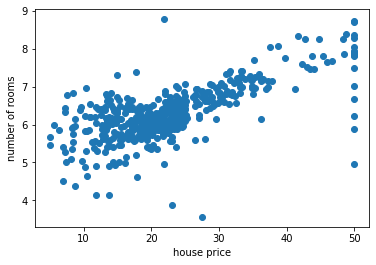

In [48]:
x = boston['MEDV'] # 房價數據
y = boston["RM"] # 房間數數據

plt.xlabel("house price") # x軸的標題
plt.ylabel("number of rooms") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形

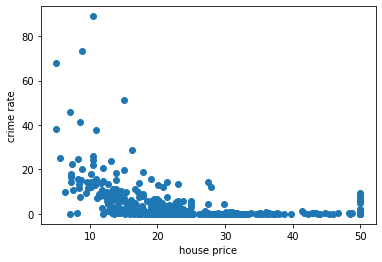

In [47]:
x = boston['MEDV'] # 房價數據
y = boston["CRIM"] # 犯罪率數據

plt.xlabel("house price") # x軸的標題
plt.ylabel("crime rate") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形